# Top 5000 Youtube channels data from Socialblade

### About the data
Socialblade is a well known company which maintains statistics of YouTube channels, Instagram accounts and many more. Their website features a page which shows Top 5000 YouTube channels and some basic information about them. The data contains Socialblade Rankings of top 5000 YouTube channels.

### Acknowledgements
The dataset is retrived from Kaggle:
https://www.kaggle.com/mdhrumil/top-5000-youtube-channels-data-from-socialblade

### Attribute
* Rank: denotes the Socialblade rankings of the YouTube channel.
* Grade: denotes the grade of the YouTube channel as conferred by Socialblade.
* Channel name: The name of the YouTube channel.
* Video Uploads: Total number of videos uploaded by the YouTube channel.
* Subscribers: Total number of subscribers of the YouTube channel.
* Video views: Total number of views of all the video content by the YouTube channel.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

## Data Preparation

In [3]:
# load data
df = pd.read_csv("data.csv")

In [4]:
# first 10 rows
df.head(10)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
0,1st,A++,Zee TV,82757,18752951,20869786591
1,2nd,A++,T-Series,12661,61196302,47548839843
2,3rd,A++,Cocomelon - Nursery Rhymes,373,19238251,9793305082
3,4th,A++,SET India,27323,31180559,22675948293
4,5th,A++,WWE,36756,32852346,26273668433
5,6th,A++,Movieclips,30243,17149705,16618094724
6,7th,A++,netd müzik,8500,11373567,23898730764
7,8th,A++,ABS-CBN Entertainment,100147,12149206,17202609850
8,9th,A++,Ryan ToysReview,1140,16082927,24518098041
9,10th,A++,Zee Marathi,74607,2841811,2591830307


In [5]:
# clean "Rank" column, remove ',' and 'th'
df['Rank'] = df['Rank'].str[:-2]
df['Rank'] = df['Rank'].str.replace(',', '') 

In [6]:
# convert string to float
df['Subscribers'] = pd.to_numeric(df['Subscribers'], errors='coerce')
df['Video Uploads'] = pd.to_numeric(df['Video Uploads'], errors='coerce')
df['Rank']= pd.to_numeric(df['Rank'], errors='coerce')

## Exploratory Data Analysis

### 1. Overview of relationship between attributes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a233c6080>,
      dtype=object)

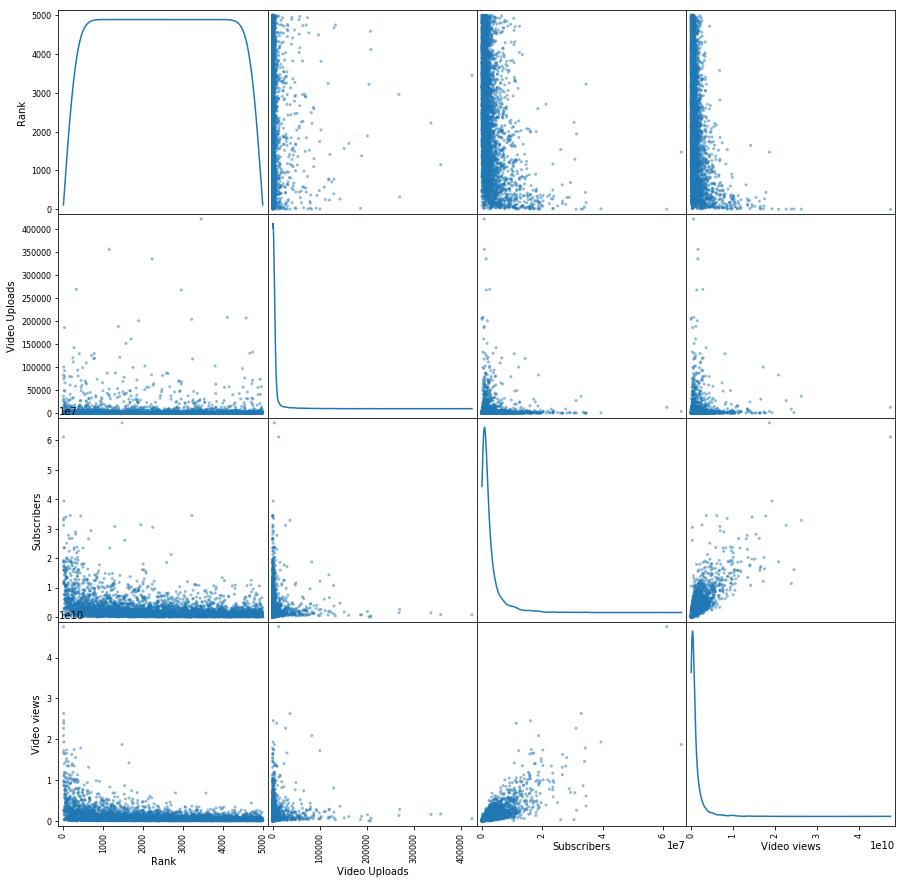

In [7]:
# Show matrix of relationship between attributes
pd.plotting.scatter_matrix(df, alpha = 0.5, figsize = (15,15), diagonal = 'kde')

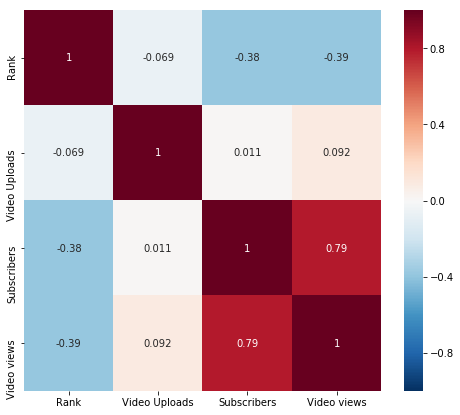

In [8]:
# Correlation heatmap
correlation = df.corr()
plt.figure(figsize=(8, 7))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

As shown in the first matrix plot and heatmap, the only positive correlation is the relationship between subscribers and video views. It is easy to explain that when a channel has more subscribers, it is easier to gain more views. However, it is surprising that subscribers, video uploads, and video views do not necessarily affect the ranking of the channels. Things like content types, reviews, likes might be other factors that really affect the ranking.

### 2. Analysing by Video Uploads

Text(0.5, 1.0, 'Number of video uploads of top 100 ranking channels')

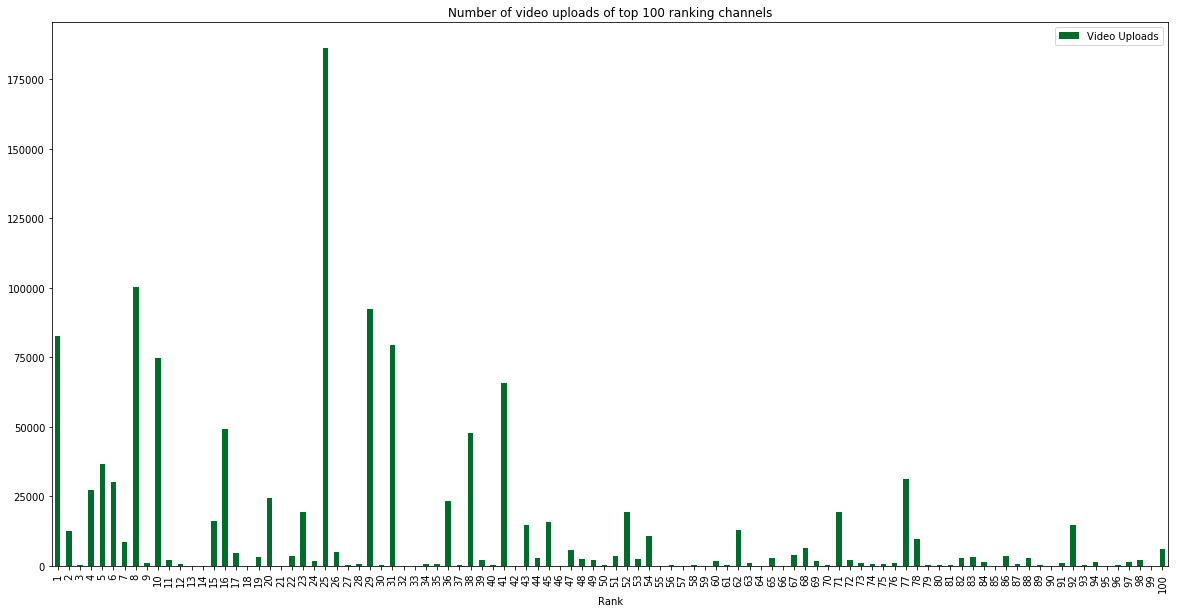

In [9]:
# Plot the number of video uploads of top 100 ranking channels
df.head(100).plot.bar(x = 'Rank', y = 'Video Uploads',figsize=(20,10),color='#006D2C')
plt.title('Number of video uploads of top 100 ranking channels')

In [10]:
# Top 20 video upload channels
upload_df= df.sort_values(['Video Uploads'],ascending=False)
upload_df.head(20)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
3453,3454,B+,AP Archive,422326.0,746325.0,548619569
1149,1150,A-,YTN NEWS,355996.0,820108.0,1640347646
2223,2224,B+,SBS Drama,335521.0,1418619.0,1565758044
323,324,A,GMA News,269065.0,2599175.0,2786949164
2956,2957,B+,MLB,267649.0,1434206.0,1329206392
4112,4113,B+,民視綜合頻道,208265.0,383022.0,659944536
4583,4584,B+,Various Artists - Topic,207072.0,30224.0,28670469
3216,3217,B+,Various Artists - Topic,203934.0,26013.0,13049365
1888,1889,A-,SBS Entertainment,200928.0,1809240.0,1477119313
1378,1379,A-,東森新聞 CH51,188502.0,720563.0,1109957965


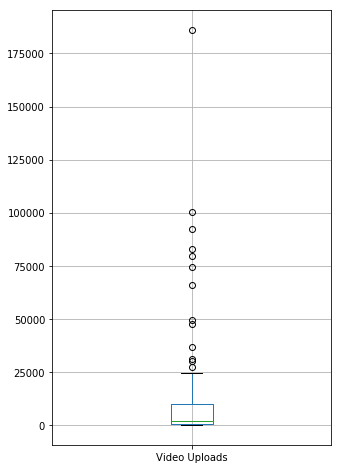

In [11]:
# Plot boxplot to show the overall video upload number of top 100 channels
df.head(100).boxplot(column=['Video Uploads'],figsize=(5,8))

In [12]:
df.head(100)['Video Uploads'].describe()

count       100.000000
mean      12280.470000
std       27345.199762
min           3.000000
25%         366.750000
50%        1869.000000
75%       10067.500000
max      186194.000000
Name: Video Uploads, dtype: float64

Speaking of the number of video uploads, when extracting the top 100 ranking channels, we can find that more video uploads tend to have a higher ranking, BUT extremely high numbers of uploads do not mean the channel will become the top 10 channels, there're some channels with low numbers of upload and ranked higher than those have much more uploads. When taking a closer look at the top 20 video upload channels, we can make an assumption that the number of uploads does not help channel to rank high! Here I highlight some overview numbers of video upload, 50% of the channels have 1,869 videos, the minimum video uploads among 5000 top rank channels is only 3 videos, and the maximum number is 186,194 videos!!

### 3. Analysing by Subscribers

In [13]:
# Sort data by subscribers and drop nan data
sub_df= df.sort_values(['Subscribers'],ascending=False).dropna()

In [14]:
sub_df.head(10)

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
1470,1471,A-,PewDiePie,3601.0,65995310.0,18684630003
1,2,A++,T-Series,12661.0,61196302.0,47548839843
11,12,A+,Canal KondZilla,822.0,39409726.0,19291034467
174,175,A,Dude Perfect,185.0,34489432.0,6095981611
3222,3223,B+,HolaSoyGerman.,137.0,34480357.0,3617584451
435,436,A,JustinBieberVEVO,123.0,34284457.0,17806717170
63,64,A,Ed Sheeran,122.0,33961184.0,14521211040
10,11,A+,5-Minute Crafts,2085.0,33492951.0,8587520379
4,5,A++,WWE,36756.0,32852346.0,26273668433
1942,1943,A-,whinderssonnunes,349.0,31332790.0,2574018722


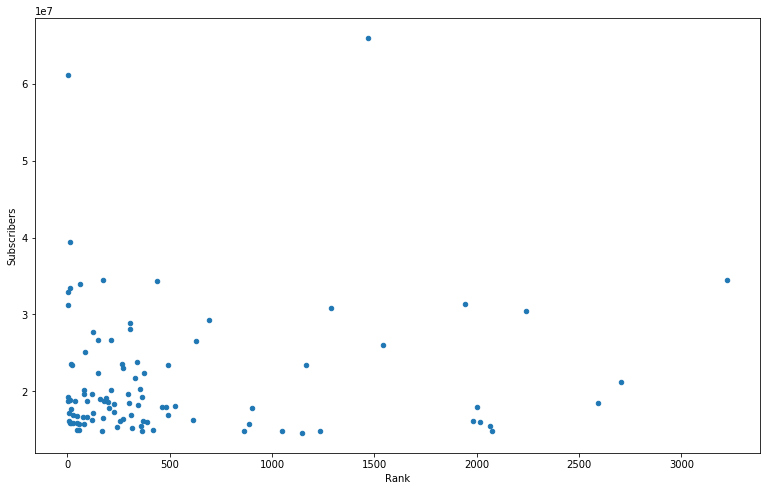

In [29]:
# Top 100 channels with most subscribe numbers among the 5000 channels
sub_df.head(100).plot.scatter(x = 'Rank', y = 'Subscribers',figsize=(13,8))

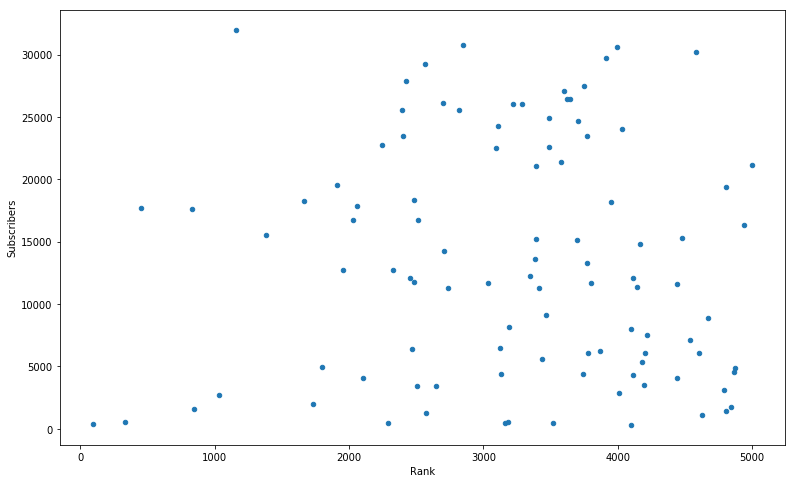

In [28]:
# Bottom 100 channels with least subscribe numbers among the 5000 channels
sub_df.tail(100).plot.scatter(x = 'Rank', y = 'Subscribers',figsize=(13,8))

### 4. Analysing by Video Views

In [17]:
# Sort data by Video views and drop nan data
view_df= df.sort_values(['Video views'],ascending=False).dropna()

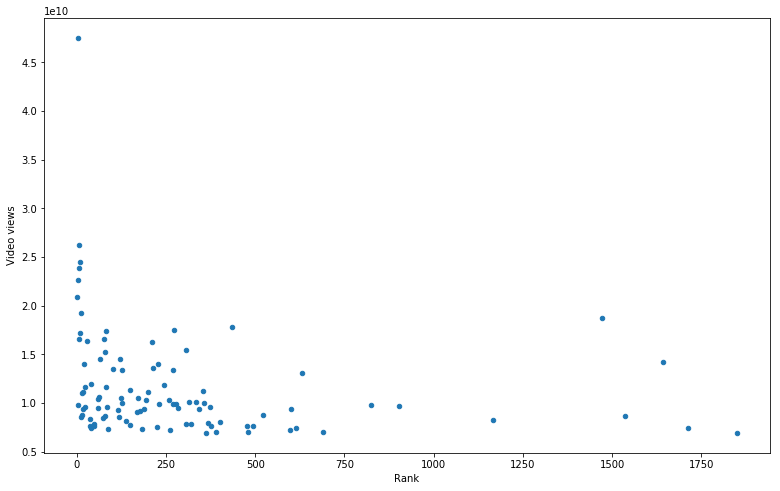

In [25]:
# Top 100 channels with most video view numbers among the 5000 channels
view_df.head(100).plot.scatter(x = 'Rank', y = 'Video views',figsize=(13,8))

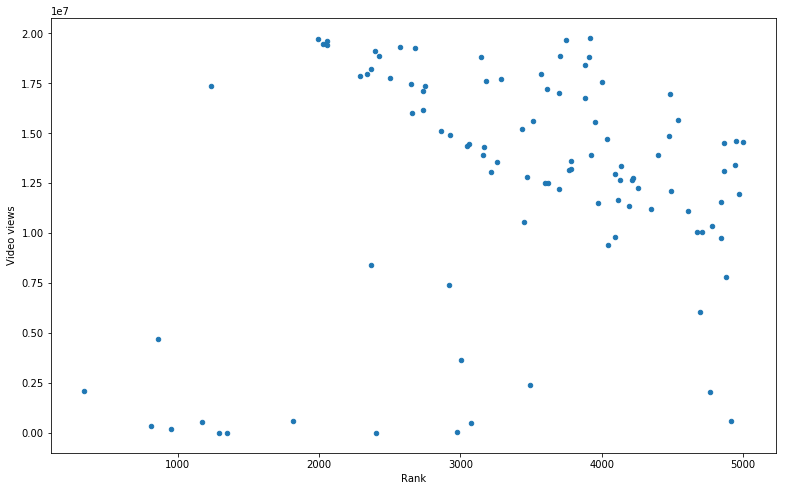

In [26]:
# Bottom 100 channels with least video view numbers among the 5000 channels
view_df.tail(100).plot.scatter(x = 'Rank', y = 'Video views',figsize=(13,8))

In [27]:
view_df.head(100)['Video views'].describe()

count    1.000000e+02
mean     1.157365e+10
std      5.576188e+09
min      6.904035e+09
25%      8.103293e+09
50%      9.857236e+09
75%      1.344610e+10
max      4.754884e+10
Name: Video views, dtype: float64

## Limitations

There're some limitations of this analysis. First, the ranking and grade of the channels are computed by Socialblade, and the company does not clearly define how they compute them. This makes the analysis ambiguous when speaking about better channels or less favorite channels. Secondly, the exact time of data scraping is not stamped. The dataset is posted around September 2018 on Kaggle, but since the Youtube data generated by Socialblade is updated every day, the exact date of the data of this analysis is unfortunately unknown. In addition, there are some missing values in the dataset which is though inevitable but might affect the result of this analysis.